# Classification Models for Fraud Detection

In [1]:
# libraries
import pandas as pd
import numpy as np

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Load Sample Datasets
- cleaned, preprocessed datasets
- used stratified random sampling


In [ ]:
import os
print(os.getcwd())

In [11]:
import pandas as pd
train = pd.read_csv('sampled_data/new_train.csv')
test = pd.read_csv('sampled_data/new_test.csv')


In [15]:
print(train.shape, test.shape)
print(train.info())

(259335, 12) (111143, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259335 entries, 0 to 259334
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          259335 non-null  float64
 1   day           259335 non-null  float64
 2   month         259335 non-null  float64
 3   amt           259335 non-null  float64
 4   zip           259335 non-null  float64
 5   city_pop      259335 non-null  float64
 6   unix_time     259335 non-null  float64
 7   age           259335 non-null  float64
 8   enc_category  259335 non-null  float64
 9   enc_city      259335 non-null  float64
 10  enc_state     259335 non-null  float64
 11  is_fraud      259335 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 23.7 MB
None


In [16]:
# train test split
X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']
X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

print(y_train.head(), y_test.head())
print(y_train.value_counts(), y_test.value_counts())
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values.ravel(), y_test.values.ravel()
print(X_train, X_test, y_train, y_test)

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64 0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64
is_fraud
0    257834
1      1501
Name: count, dtype: int64 is_fraud
0    110714
1       429
Name: count, dtype: int64
[[-0.11805205 -1.19921135  1.71397339 ... -0.31373595  0.64089987
   0.51097144]
 [-0.70474975  0.83949739 -0.33418646 ... -1.59138383 -0.18276597
   1.13898185]
 [-0.70474975  0.7262358  -0.33418646 ... -1.59138383  1.25188204
   1.27853971]
 ...
 [ 0.76199448  1.06602059 -0.62678072 ... -1.33585425 -0.04355484
   0.79008718]
 [ 0.17529679  0.95275899 -0.0415922  ... -1.59138383  0.38954644
   0.65052931]
 [ 0.61532006  0.7262358  -0.0415922  ...  0.1973232   0.38954644
   0.65052931]] [[ 0.02803414 -1.05679322 -0.76257864 ... -1.59398566 -0.67922833
  -0.62136507]
 [ 1.34944204 -0.27513346 -0.76257864 ... -0.06058434  1.69401428
   0.08701553]
 [ 1.49626514  0.39486062 -1.26808779 ...  1.72838387  1.20384369
  -0.69220313]
 ...
 [ 1.20261894 

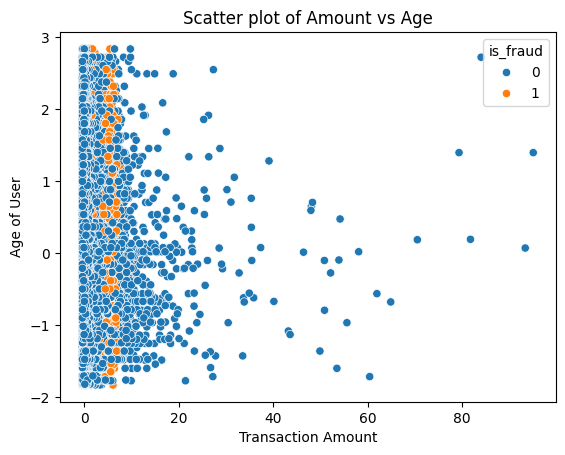

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot with different colors for each class
combined_df = pd.concat([train, test], ignore_index=True)
sns.scatterplot(x='amt', y='age', hue='is_fraud', data=combined_df)
plt.xlabel('Transaction Amount')
plt.ylabel('Age of User')
plt.title('Scatter plot of Amount vs Age')
plt.show()

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


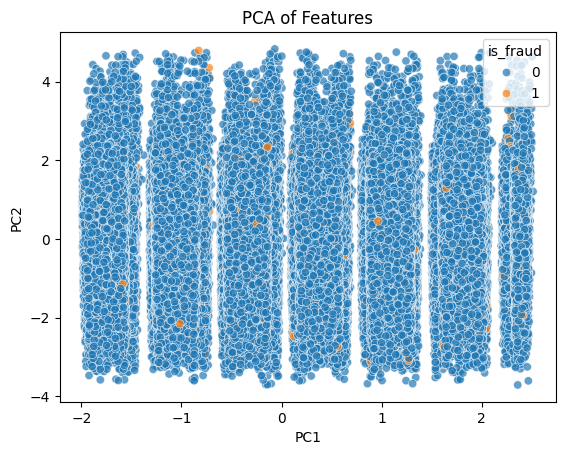

In [18]:
from sklearn.decomposition import PCA
import numpy as np

# Extract features (excluding target)
features = combined_df.drop(columns=['is_fraud'])
target = combined_df['is_fraud']

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['is_fraud'] = target

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', hue='is_fraud', data=pca_df, alpha=0.7)
plt.title('PCA of Features')
plt.show()


## Feature Selection for Logistic Regression

We decided to use Logistic Regression because of Binary Classification

Numerical Feature	Correlation with is_fraud
- amt	0.45
- zip	-0.10
- city_pop	0.30
- unix_time	-0.25
- age	0.50

Strong correlation with is_fraud: **amt, city_pop, age**

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9954742988762225
ROC-AUC Score: 0.4996658055891757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111143
   macro avg       0.50      0.50      0.50    111143
weighted avg       0.99      1.00      0.99    111143



In [20]:
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.944755855069595
ROC-AUC Score: 0.8422405734037506
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110714
           1       0.05      0.74      0.09       429

    accuracy                           0.94    111143
   macro avg       0.52      0.84      0.53    111143
weighted avg       1.00      0.94      0.97    111143

[[104686   6028]
 [   112    317]]


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy Score: 0.9972557875889619
ROC-AUC Score: 0.8442115687902129
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.63      0.69      0.66       429

    accuracy                           1.00    111143
   macro avg       0.82      0.84      0.83    111143
weighted avg       1.00      1.00      1.00    111143



In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9983084854646717
ROC-AUC Score: 0.8087494214813253
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110714
           1       0.92      0.62      0.74       429

    accuracy                           1.00    111143
   macro avg       0.96      0.81      0.87    111143
weighted avg       1.00      1.00      1.00    111143

